Kaggle titanic 데이터를 활용한 EDA 연습  
참고 링크 : https://www.kaggle.com/code/kalelpark/kaggle-titanic-for-korean

In [12]:
# 데이터 분석 및 다루기(data analysis and wrangling)
import pandas as pd
import numpy as np
import random as rnd

# 데이터 시각화(visualization)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 머신러닝(machine learning)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [13]:

train_df = pd.read_csv('../content/titanic/train.csv')
test_df = pd.read_csv('../content/titanic/test.csv')
combine = [train_df , test_df]

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# DataFrame.describe() 을 사용하면 수치형 데이터만을 알려주지만,  include = ['O'] 를 지정하면, 범주형 데이터를 알려준다.

# train_df.describe()
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [16]:
print(type(train_df.columns))   # df.columns  는 index 타입이며, index.values보다 index.arrary / index.to_numpy()을 사용
print(type(train_df.columns.to_numpy()))
print(train_df.columns.to_numpy().tolist())     # array.tolist() 으로 list로 변환
s = pd.Series((train_df.columns.to_numpy().tolist()))  # 이걸 다시 pandas.Series(list) 으로 series 변환
print(s)
df_s = pd.DataFrame(s)      # series 을 dataFrame 으로 변환
df_s

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
0     PassengerId
1        Survived
2          Pclass
3            Name
4             Sex
5             Age
6           SibSp
7           Parch
8          Ticket
9            Fare
10          Cabin
11       Embarked
dtype: object


,0
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


groupby

In [17]:
print(type(train_df.groupby('Pclass',as_index=False)))    # DataFrameGroupBy 타입이므로 해당 타입에서 사용할 수 있는 method을 사용해야 함.
train_df_corr = train_df.groupby('Pclass').corr(method='pearson')
train_df_corr

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


PassengerId  Survived       Age     SibSp     Parch  \
Pclass                                                                    
1      PassengerId     1.000000  0.159824 -0.003969 -0.055167 -0.026157   
       Survived        0.159824  1.000000 -0.267964  0.162276  0.062565   
       Age            -0.003969 -0.267964  1.000000 -0.121015 -0.243613   
       SibSp          -0.055167  0.162276 -0.121015  1.000000  0.261954   
       Parch          -0.026157  0.062565 -0.243613  0.261954  1.000000   
       Fare           -0.026348  0.190966 -0.218611  0.259492  0.380963   
2      PassengerId     1.000000 -0.026030  0.039077  0.079737  0.077052   
       Survived       -0.026030  1.000000 -0.273507  0.145340  0.361793   
       Age             0.039077 -0.273507  1.000000 -0.210424 -0.300814   
       SibSp           0.079737  0.145340 -0.210424  1.000000  0.326626   
       Parch           0.077052  0.361793 -0.300814  0.326626  1.000000   
       Fare            0.021281  0.098628 -0.197038  0.546093  0.373920   
3      PassengerId     1.000000 -0.096550  0.034886 -0.080127 -0.014438   
       Survived       -0.096550  1.000000 -0.202102 -0.073339  0.017257   
       Age             0.034886 -0.202102  1.000000 -0.435763 -0.138434   
       SibSp          -0.080127 -0.073339 -0.435763  1.000000  0.464733   
       Parch          -0.014438  0.017257 -0.138434  0.464733  1.000000   
       Fare            0.002053  0.000930 -0.260315  0.766003  0.585265   

                        Fare  
Pclass                        
1      PassengerId -0.026348  
       Survived     0.190966  
       Age         -0.218611  
       SibSp        0.259492  
       Parch        0.380963  
       Fare         1.000000  
2      PassengerId  0.021281  
       Survived     0.098628  
       Age         -0.197038  
       SibSp        0.546093  
       Parch        0.373920  
       Fare         1.000000  
3      PassengerId  0.002053  
       Survived     0.000930  
       Age         -0.260315  
       SibSp        0.766003  
       Parch        0.585265  
       Fare         1.000000

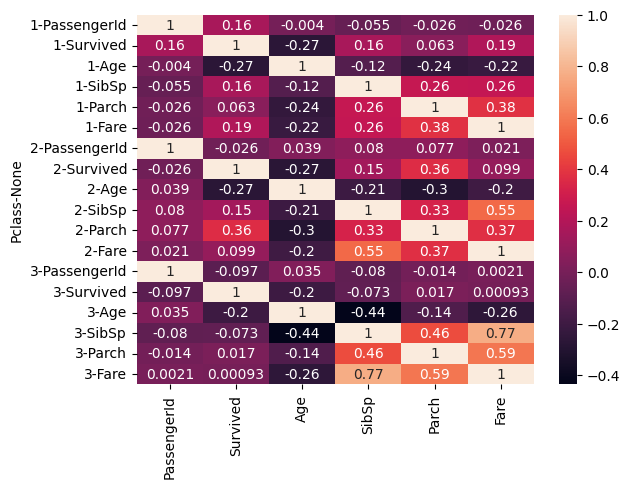

In [18]:
sns.heatmap(train_df_corr,annot=True)
plt.show()


In [19]:
# chained indexing??? 
print(type(train_df.groupby('Pclass',as_index=False).mean('Survived')))  # DataFrame 이므로 df method 사용
train_df.groupby('Pclass',as_index=False).mean('Survived')[['Age','Survived']]

<class 'pandas.core.frame.DataFrame'>


,Age,Survived
0,38.233441,0.629630
1,29.877630,0.472826
2,25.140620,0.242363


In [20]:
print(type(train_df.loc[:,['Pclass', 'Survived']].groupby('Pclass',as_index=False)))
train_df.loc[:,['Pclass', 'Survived']].groupby('Pclass',as_index=False).sum('Survived')

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [21]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()\
    .sort_values(by = 'Survived', ascending = False)  

#DataFrameGroupBy.mean() 이 DataFrame 을 리턴하므로 df.sort_values() 사용 
# sort_values 는 df 리턴


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
isinstance(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()\
    .sort_values(by = 'Survived', ascending = False),pd.DataFrame)

True

<class 'seaborn.axisgrid.FacetGrid'>


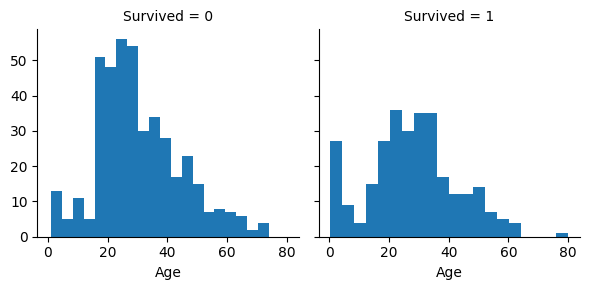

In [11]:
# FaceGrid(참고) :  https://steadiness-193.tistory.com/201
g = sns.FacetGrid(train_df, col = 'Survived')
print(type(g))
g.map(plt.hist, 'Age', bins = 20)

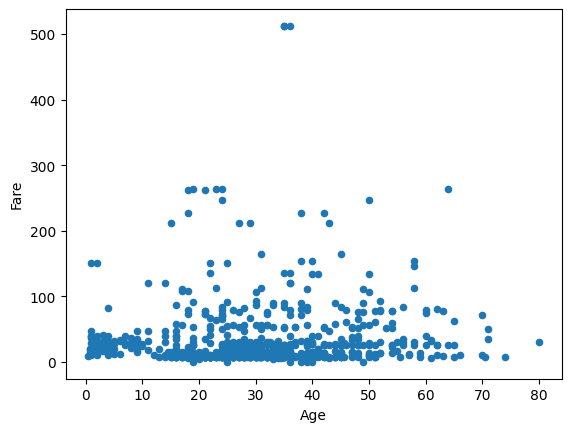

In [29]:
train_df.plot(kind='scatter',
              x = 'Age',
              y = 'Fare')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

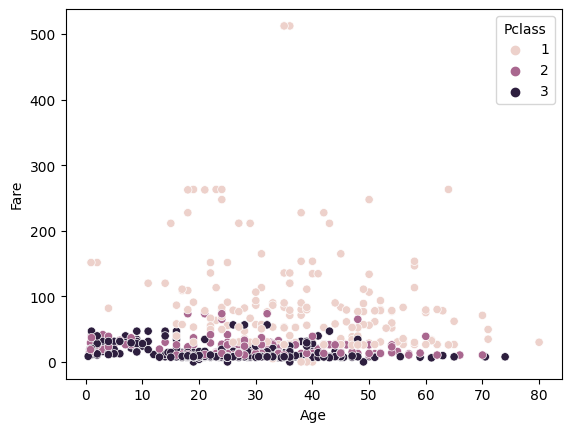

In [34]:
sns.scatterplot( x ='Age',
                y = 'Fare',
                hue='Pclass',
                data = train_df)

In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
